<a href="https://colab.research.google.com/github/wagtail37/Life-Engineering-Practice-Project/blob/main/displayCalibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install colour-science

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colour

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def displayCalibration(r,g,b):
  #experimental data
  Yr_max=22.6
  Yg_max=47.0
  Yb_max=4.33
  γ_r= 2.1464
  γ_g= 2.1073
  γ_b= 1.9374
  xr, yr= 0.61, 0.368
  xg, yg=0.293, 0.631
  xb, yb=0.147, 0.114
  #subpixelLuminance(Yr,Yg,Yb) , (5)
  subpixelLuminance=np.array([(r/255)**γ_r*Yr_max, (g/255)**γ_g*Yg_max, (b/255)**γ_b*Yb_max])
  matrix = np.array([[xr/yr, xg/yg, xb/yb],[1,1,1],[(1-xr-yr)/yr, (1-xg-yg)/yg,(1-xb-yb)/yb ]])
  #ColorVector(X,Y,Z) ,(4)
  ColorVector=np.dot(matrix,subpixelLuminance)
  #Luminance Y ,(1)
  #chromaticity coordinates(x,y),(1)
  Y = ColorVector[1]
  x = ColorVector[0]/np.sum(ColorVector)
  y = ColorVector[1]/np.sum(ColorVector)
  # Round to the third decimal place
  Y = round(Y, 3)
  x = round(x, 3)
  y = round(y, 3)

  return Y,x,y


a.(100,100,100)

In [ ]:
result=displayCalibration(100,100,100)
print(f"luminance Y: {result[0]} \nchromaticity coordinates(x,y):({result[1]},{result[2]})")

luminance Y: 10.274 
chromaticity coordinates(x,y):(0.362,0.414)


b. (200,50,50)

In [ ]:
result=displayCalibration(200,50,50)
print(f"luminance Y: {result[0]} \nchromaticity coordinates(x,y):({result[1]},{result[2]})")

luminance Y: 15.118 
chromaticity coordinates(x,y):(0.573,0.373)


c. (50,200,50)

In [ ]:
result=displayCalibration(50,200,50)
print(f"luminance Y: {result[0]} \nchromaticity coordinates(x,y):({result[1]},{result[2]})")

luminance Y: 29.037 
chromaticity coordinates(x,y):(0.3,0.603)


d. (50,50,200)

In [ ]:
result=displayCalibration(50,50,200)
print(f"luminance Y: {result[0]} \nchromaticity coordinates(x,y):({result[1]},{result[2]})")

luminance Y: 4.906 
chromaticity coordinates(x,y):(0.19,0.175)


In [ ]:
a=displayCalibration(100,100,100)
b=displayCalibration(200,50,50)
c=displayCalibration(50,200,50)
d=displayCalibration(50,50,200)

list1=[[a[0],a[1],a[2]], [b[0],b[1],b[2]], [c[0],c[1],c[2]], [d[0],d[1],d[2]]]
index1 = ["a.(100,100,100)", "b.(200,50,50)", "c.(50,200,50)", "d.(50,50,200)"]
columns1 =["Calculated_Y", "Calculated_x", "Calculated_y"]
df=pd.DataFrame(data=list1, index=index1, columns=columns1)
df

,Calculated_Y,Calculated_x,Calculated_y
"a.(100,100,100)",10.274,0.362,0.414
"b.(200,50,50)",15.118,0.573,0.373
"c.(50,200,50)",29.037,0.300,0.603
"d.(50,50,200)",4.906,0.190,0.175


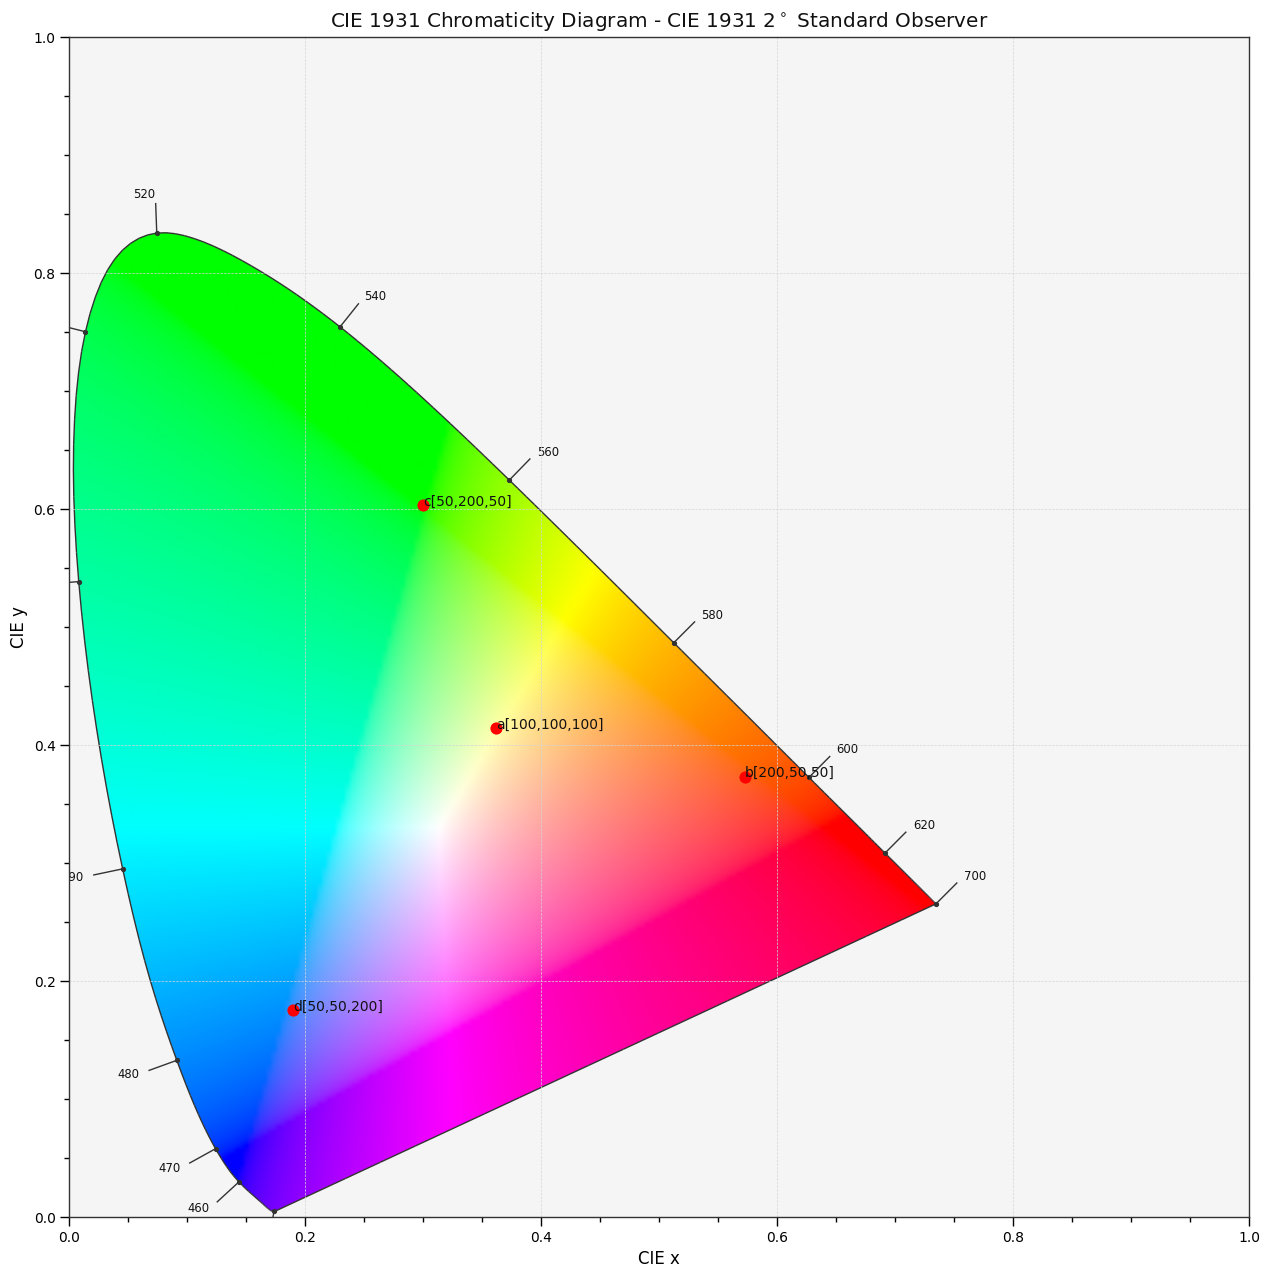

In [ ]:
#Plot chromaticity coordinates
colour.plotting.colour_style()
colour.plotting.plot_chromaticity_diagram_CIE1931(standalone=False)
plt.plot([a[1], b[1], c[1], d[1]], [a[2], b[2], c[2], d[2]], 'o',markersize=8, color = 'red')
plt.annotate("a[100,100,100]", (a[1], a[2]))
plt.annotate("b[200,50,50]", (b[1], b[2]))
plt.annotate("c[50,200,50]", (c[1], c[2]))
plt.annotate("d[50,50,200]", (d[1], d[2]))
plt.show()

In [ ]:
df2=pd.read_csv("Measured.csv", index_col=0)
df2

,Measured_Y,Measured_x,Measured_y
"a.(100,100,100)",8.73,0.362,0.426
"b.(200,50,50)",12.70,0.576,0.376
"c.(50,200,50)",26.50,0.299,0.600
"d.(50,50,200)",4.32,0.187,0.174


In [ ]:
df3 = pd.concat([df, df2], axis=1)
df3

,Calculated_Y,Calculated_x,Calculated_y,Measured_Y,Measured_x,Measured_y
"a.(100,100,100)",10.274,0.362,0.414,8.73,0.362,0.426
"b.(200,50,50)",15.118,0.573,0.373,12.70,0.576,0.376
"c.(50,200,50)",29.037,0.300,0.603,26.50,0.299,0.600
"d.(50,50,200)",4.906,0.190,0.175,4.32,0.187,0.174


In [ ]:
# 初期データの作成
data = {
    'RGB': ['(100,100,100)', '(200,50,50)', '(50,200,50)', '(50,50,200)'],
    'Calculated_Y': [10.274, 15.118, 29.037, 4.906],
    'Calculated_x': [0.362, 0.573, 0.300, 0.190],
    'Calculated_y': [0.414, 0.373, 0.603, 0.175],
    'Measured_Y': [8.73, 12.70, 26.50, 4.32],
    'Measured_x': [0.362, 0.576, 0.299, 0.187],
    'Measured_y': [0.426, 0.376, 0.600, 0.174]
}

# データフレームの作成
df = pd.DataFrame(data)

# 誤差の計算
df['Error_Y'] = abs(df['Calculated_Y'] - df['Measured_Y'])
df['Error_x'] = abs(df['Calculated_x'] - df['Measured_x'])
df['Error_y'] = abs(df['Calculated_y'] - df['Measured_y'])

# 誤差のデータフレームを表示
print(df[['RGB', 'Error_Y', 'Error_x', 'Error_y']])

             RGB  Error_Y  Error_x  Error_y
0  (100,100,100)    1.544    0.000    0.012
1    (200,50,50)    2.418    0.003    0.003
2    (50,200,50)    2.537    0.001    0.003
3    (50,50,200)    0.586    0.003    0.001


これらの誤差の原因として、RGBが小さくなるとγ特性に誤差が出ること、計測器具の精度、ディスプレイの色再現性、照明条件、または色の表現方法（色空間）の選択が考えられる